In [2555]:
import pandas as pd
import sqlite3
from IPython.display import display
pd.options.display.max_columns = None
import random
import numpy as np

In [2161]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2554]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MaxAbsScaler

In [2556]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [1314]:
original_db=sqlite3.connect('cells_markers.sqlite')

In [1315]:
sql_cells='''SELECT * FROM Collect_Cells'''

In [1316]:
original_cells_df=pd.read_sql_query(sql_cells,original_db)

In [1317]:
original_cells_df

,article_id,Monocyte,T_lymphocyte,B_lymphocyte,Natural_Killer,Neutrophil,Eosinophil,Basophil,Macrophage,Erythrocyte,Platelet
0,10_3389_fimmu_2022_764557,344,0,0,0,1,0,0,19,1,0
1,10_3389_fimmu_2019_02779,315,0,0,0,3,0,0,37,0,0
2,10_1038_s41598-020-61022-1,274,0,2,0,0,0,0,3,0,0
3,10_1002_JLB_4RI0818-311,362,0,0,0,4,0,0,2,0,0
4,10_1371_journal_ppat_1008361,426,0,0,0,28,0,0,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1106,10_1128_iai_68_6_3564-3568_2000,0,0,0,0,0,0,0,0,64,0
1107,10_1080_20013078_2020_1743139,0,0,0,0,0,0,0,0,27,27
1108,10_1182_blood-2007-07-099473,0,0,0,0,0,0,0,0,53,0
1109,10_1016_j_pt_2006_02_007,0,0,0,0,0,0,0,0,26,0


In [1318]:
sql_markers='''SELECT * FROM Collect_Markers'''

In [1319]:
original_markers_df=pd.read_sql_query(sql_markers,original_db)

In [1320]:
original_markers_df

,article_id,CD45,CD11B,CD115,CD5276F,CD3825,CD16,CD14,CD3,CD45R,CD64,CD24,CD19,CD72,CD11C,CD4,CD32,CD74,CD62L,CD49D,CD43,CD335,CD80,CD86,CD162,CD56,CD163,CD7,CD36,CD209A,CD135,CD117,CD116,CD8,CD47,CD172A,CD33,CD90,CD103,CD44,CD11A,CD9,CD7C,CD31,CD102,CD300E,CD141,CD15,CD2,CD1C,CD68,CD206,CD40L,CD154,CD147,CD62P,CD41A,CD61,CD18,CD40,CD41,CD20,CD44V,CD83,CD93,CD114,CD3E,CD28,CD5,CD66B,CD13,CD57,CD54,CD123,CD99,CD169,CD1A,CD81,CD42B,CD34,CD202B,CD319,CD29,CD200R,CD204,CD192,CD66,CD10,CD45RA,CD66ABCE,CD133,CD146,CD52L,CD1D,CD91,CD35,CD105,CD97,CD63,CD3D,CD79A,CD131,CD205,CD301B,CD95L,CD49E,CD209,CD168,CD84940F,CD71,CD161,CD13101FD,CD7A,CD38,CD159A,CD8A,CD25,CD274,CD273,CD279,CD45RO,CD69,CD127,CD317,CD161A,CD68POS,CD43POS,CD68POSCD,CD68NEGCD,CD49B,CD0,CD49A,CD49F,CD88,CD050,CD6359,CD45HI,CD3735D,CD98,CD62E,CD160,CD39,CD27,CD79B,CD16B,CD124,CD370,CD14HI,CD14MID,CD95,CD301,CD209F,CD182,CD183,CD184,CD195,CD197,CD9A,CD1,CD144,CD5757484608,CD142,CD14LOW,CD14HIGH,CD368,CD14LOWCD,CD151,CD200,CD82,CD53,CD37,CD005,CD17A,CD6DE,CD294,CD12BB,CD86IN,CD80058A,CD226,CD51,CD24A,CD49,CD4517,CD1617,CD11,CD74CF,CD14DIMCD,CD7114A,CD6,CD8B,CD32HICD,CD107A,CD106,CD101,CD84,CD177,CD99L,CD87,CD570,CD170,CD181,CD52,CD17,CD32A,CD89,CD32C,CD16A,CD32B,CD30,CD22,CD70,CD66A,CD119,CD23,CD346,CD46,CD193,CD138,CD62,CD177P,CD62LDIM,CD16L,CD66BCD,CD203C,CD48,CD304,CD235A,CD125,CD140A,CD40LG,CD326,CD178,CD207,CD284,CD86FAD,CD282,CD6874432,CD41B,CD26,CD55,CD8E,CD94,CD39D,CD4T,CD6EC,CD137,CD69CD,CD366,CD300A,CD300F,CD0C,CD18D,CD11D,CD244,CD300,CD40LIGAND,CD120A,CD724,CD1LC,CD014C,CD382E,CD180,CD203,CD21,CD054AFE,CD108,CD66E,CD15S,CD101LOW,CD101HIGH,CD58,CD67,CD125INT,CD3A,CD59,CD284E,CD73,CD5E,CD11BINT,CD134,CD871410,CD300C,CD164,CD107B,CD303,CD191,CD194,CD196,CD2C,CD93D,CD63HI,CD63HIGH,CD150,CD65S,CD1AD,CD2231F,CD275,CD252,CD6845A,CD212,CD64LO,CD305,CD235,CD34B,CD371,CD327,CD45DIM,CD123BRIGHT,CD89709055B,CD6F,CD85756D,CD122,CD200RLC,CD200RLB,CD200RLA,CD1CS,CD104,CD96,CD209B,CD155,CD137L,CD2B,CD340,CD329,CD121B,CD276,CD163N,CD163T,CD258,CD152,CD312,CD79,CD7219C,CD148,CD1335B,CD06F,CD4DF,CD01EADE,CD1LG,CD03,CD11CDIMCX,CD206N,CD206P,CD50,CD11LOW,CD21C,CD0F,CD120B,CD1B,CD5ABFC,CD186,CD69L,CD30L,CD5A,CD6L,CD3F,CD0828TR,CD25HI,CD127LOW,CD234C,CD4CTLA,CD4PD,CD4FOXP,CD4CD,CD8CD,CD4OX,CD132,CD235AB,CD354,CD130,CD61B,CD141C,CD85,CD112R,CD112,CD113,CD147HIGH,CD827,CD3G,CD235685,CD56BRIGHT,CD25BRIGHT,CD127LO,CD1DTM,CD247,CD23INT,CD26C,CD15C,CD0D,CD38MID,CD38LOW,CD38HI,CD01F,CD19HICD,CD088B,CD40DF,CD45RB,CD45RABC,CD19DS,CD16DS,CD20CY,CD272,CD223,CD357,CD278,CD486B,CD68R,CD1AC,CD45FITC,CD4PE,CD8ECD,CD3PC,CD56PE,CD19ECD,CD16PE,CD126,CD4SP,CD8SP,CD4B,CD77,CD38HICD,CD20SCFV,CD19SCFV,CD3SCFV,CD75F,CD166,CD225,CD27L,CD249,CD158,CD336,CD337,CD253,CD158B,CD314,CD159C,CD203A,CD215,CD309,CD267,CD44LOCD,CD4MAB,CD45RC,CD107,CD218,CD218A,CD24HI,CD138STAININGTOGETHERWITHASURFACEMARKERS,CD158A,CD158E,CD158H,CD158I,CD158D,CD85J,CD328,CD158J,CD158F,CD352,CD158K,CD172,CD201,CD234,CD140B,CD54WAS,CD11R,CD298,CD574,CD20B,CD581,CD157,CD1377,CD45RBLOW,CD65,CD56DIMNKG,CD45RTA,CD56DIM,CD229,CD38HIGH,CD3Z,CD111,CD16XCD,CD121A,CD271,CD349,CD16BRIGHT,CD16DIM,CD306,CD295,CD360,CD224,CD3AND,CD19DEPLETED,CD3DEPLETED,CD159,CD56BRIGHTCD,CD5R,CD16LOW,CD58J,CD161C,CD6A,CD161B,CD8MAG,CD233,CD236R,CD33RSIGLECS,CD33RSIGLEC,CD8CF,CD8DC,CD239,CD110,CD26P,CD009072,CD004269,CD42,CD42A,CD62PJONA,CD109,CD42BAPC,CD143,CD49ABS,CD41599,CD42D,CD4530,CD16INT,CD45LO,CD15CD,CD3CD,CD56DIMCD,CD16MAB,CD21LOW,CD3NEGATIVE,CD27NEGATIVE,CD66C,CD24FC,CD280,CD8035F,CD253A,CD236,CD3625A,CD2BE,CD238,CD240,CD41CD
0,10_3389_fimmu_2022_764557,8,37,7,1,1,5,3,7,1,6,1,3,1,2,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

In [1555]:
markers_df=original_markers_df.reindex(sorted(original_markers_df.columns),axis=1).set_index('article_id').fillna(0).astype('int')

In [1556]:
cells_df=original_cells_df.set_index('article_id').fillna(0).astype('int')

In [1557]:
test_data=markers_df.sum(axis=1).sort_values(ascending=False).to_frame(name='sum_markers')

In [1558]:
test_data

,sum_markers
article_id,
10_1002_eji_201970107,5003
10_1002_14651858_CD009072_pub3,4455
10_1038_s41598-017-11926-2,822
10_1084_jem_20210987,680
10_1038_s41423-018-0198-5,593
...,...
10_1152_ajpcell_00177_2017,0
10_1007_s11010-016-2770-6,0
10_1016_j_cub_2020_05_030,0


In [1559]:
markers_df=markers_df.drop(index=test_data.query('sum_markers<20').index)

In [1560]:
cells_df=cells_df.drop(index=test_data.query('sum_markers<20').index)

In [1561]:
cells_df.T.sum(axis=1).sort_values(ascending=False)

Monocyte          28906
Macrophage        28345
Neutrophil        27302
Platelet          24516
Eosinophil        15218
Basophil          14768
T_lymphocyte      12645
B_lymphocyte       5614
Erythrocyte        2225
Natural_Killer     1393
dtype: int64

In [1565]:
markers_df

,CD1,CD10,CD101,CD102,CD103,CD105,CD106,CD107A,CD107B,CD11,CD112,CD115,CD116,CD117,CD11A,CD11B,CD11C,CD122,CD123,CD125,CD127,CD13,CD131,CD132,CD133,CD134,CD135,CD137,CD137L,CD138,CD14,CD140A,CD141,CD144,CD146,CD147,CD15,CD150,CD151,CD154,CD155,CD158A,CD158B,CD158E,CD159A,CD15S,CD16,CD160,CD161,CD161A,CD162,CD163,CD164,CD169,CD16A,CD16B,CD172A,CD177,CD18,CD180,CD182,CD184,CD19,CD193,CD197,CD1A,CD1B,CD1C,CD1D,CD2,CD20,CD200,CD200R,CD203,CD203C,CD204,CD205,CD206,CD207,CD209,CD21,CD22,CD226,CD23,CD233,CD235,CD235A,CD236R,CD24,CD244,CD25,CD26,CD27,CD273,CD274,CD279,CD28,CD29,CD3,CD30,CD300A,CD300F,CD301,CD301B,CD303,CD304,CD305,CD31,CD314,CD319,CD32,CD32A,CD32B,CD33,CD335,CD337,CD34,CD34B,CD35,CD36,CD37,CD38,CD39,CD3E,CD4,CD40,CD40L,CD41,CD41A,CD42A,CD42B,CD43,CD44,CD45,CD45R,CD45RA,CD45RB,CD45RO,CD46,CD47,CD48,CD49A,CD49B,CD49D,CD49E,CD49F,CD5,CD51,CD52,CD53,CD54,CD55,CD56,CD57,CD58,CD59,CD6,CD61,CD62,CD62E,CD62L,CD62P,CD63,CD64,CD66,CD66B,CD68,CD69,CD7,CD70,CD71,CD73,CD74,CD77,CD79,CD79A,CD79B,CD8,CD80,CD81,CD82,CD83,CD85J,CD86,CD88,CD89,CD8A,CD9,CD90,CD93,CD94,CD95,CD95L,CD96,CD98,CD99
article_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10_3389_fimmu_2022_764557,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,37,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10_3389_fimmu_2019_02779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10_1038_s41598-020-61022-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,12,6,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,38,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,35,0,0,4,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0
10_1002_JLB_4RI0818-311,0,0,0,0,2,0,0,0,0,0,0,3,1,1,0,10,6,0,0,0,0,0,0,0,0,0,2,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,5,1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
10_1371_journal_ppat_1008361,0,0,0,2,0,0,0,0,0,0,0,0,0,0,20,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [1562]:
summ_markers=markers_df.sum(axis=0).sort_values(ascending=False).to_frame(name='summ_one_mark')

In [1563]:
markers_df=markers_df.drop(summ_markers.query('summ_one_mark<10').index,axis=1).drop('CD009072',axis=1)

In [1564]:
markers_df.eval('CD14=CD14+CD14MID+CD14HI',inplace=True)
markers_df.eval('CD19=CD19+CD19DS',inplace=True)
markers_df.eval('CD56=CD56+CD56BRIGHT+CD56DIM',inplace=True)
markers_df.eval('CD127=CD127+CD127LOW',inplace=True)
markers_df.eval('CD38=CD38+CD38LOW',inplace=True)
markers_df.eval('CD25=CD25+CD25HI',inplace=True)
markers_df.eval('CD66=CD66+CD66ABCE',inplace=True)
markers_df=markers_df.drop(['CD14MID','CD19DS','CD56BRIGHT','CD56DIM','CD127LOW','CD14HI','CD38LOW','CD66ABCE','CD25HI'],axis=1)

array([[<AxesSubplot:title={'center':'CD1'}>,
        <AxesSubplot:title={'center':'CD10'}>,
        <AxesSubplot:title={'center':'CD101'}>,
        <AxesSubplot:title={'center':'CD102'}>,
        <AxesSubplot:title={'center':'CD103'}>,
        <AxesSubplot:title={'center':'CD105'}>,
        <AxesSubplot:title={'center':'CD106'}>,
        <AxesSubplot:title={'center':'CD107A'}>,
        <AxesSubplot:title={'center':'CD107B'}>,
        <AxesSubplot:title={'center':'CD11'}>,
        <AxesSubplot:title={'center':'CD112'}>,
        <AxesSubplot:title={'center':'CD115'}>,
        <AxesSubplot:title={'center':'CD116'}>,
        <AxesSubplot:title={'center':'CD117'}>],
       [<AxesSubplot:title={'center':'CD11A'}>,
        <AxesSubplot:title={'center':'CD11B'}>,
        <AxesSubplot:title={'center':'CD11C'}>,
        <AxesSubplot:title={'center':'CD122'}>,
        <AxesSubplot:title={'center':'CD123'}>,
        <AxesSubplot:title={'center':'CD125'}>,
        <AxesSubplot:title={'center':'CD1

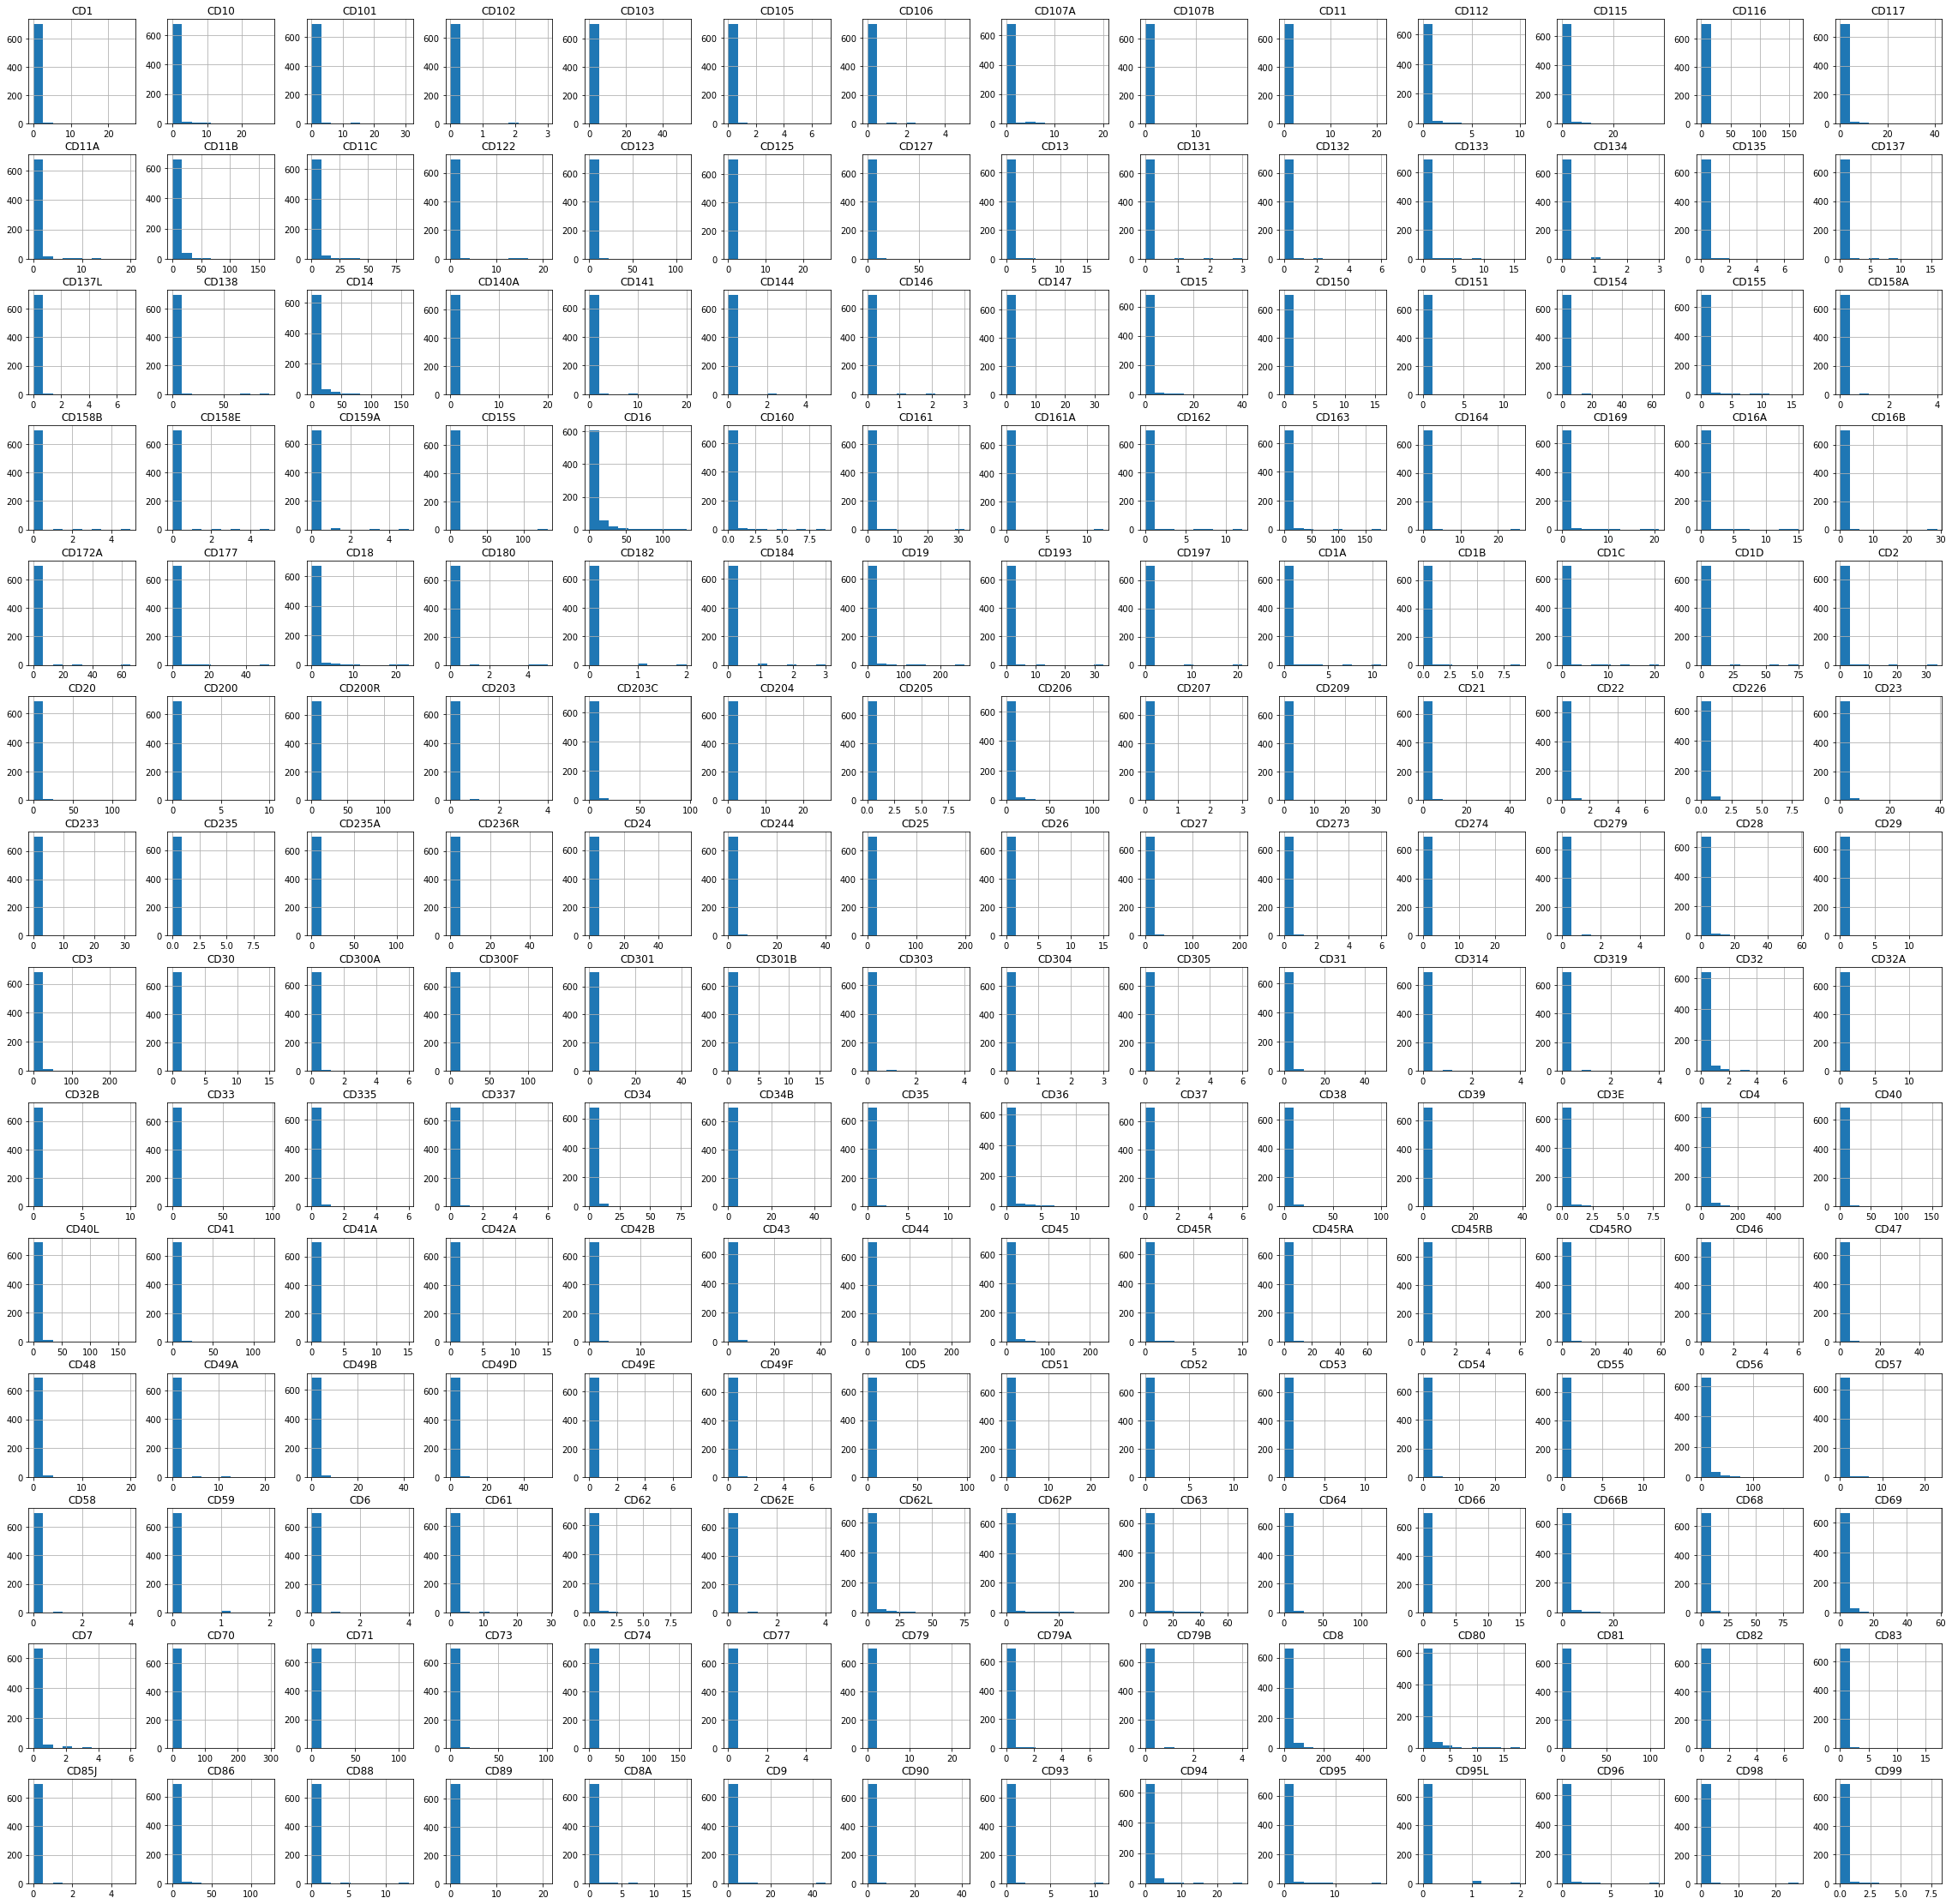

In [1543]:
markers_df.hist(figsize=(40, 40))

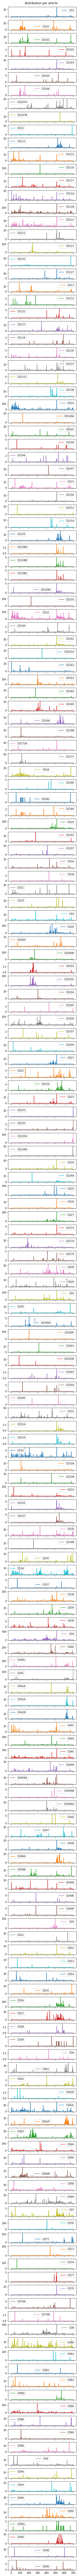

In [1544]:
markers_df.plot(subplots=True, figsize=(5, 150), use_index=False, title='distribution per article')
plt.subplots_adjust(left=0.125, bottom=0.01, right=0.9, top=0.978, wspace=0.2, hspace=0.3)

In [1566]:
transform_markers = MaxAbsScaler().fit(markers_df)

In [1567]:
transf_markers_df=pd.DataFrame(transform_markers.transform(markers_df),columns=markers_df.columns)

In [1568]:
transf_markers_df

,CD1,CD10,CD101,CD102,CD103,CD105,CD106,CD107A,CD107B,CD11,CD112,CD115,CD116,CD117,CD11A,CD11B,CD11C,CD122,CD123,CD125,CD127,CD13,CD131,CD132,CD133,CD134,CD135,CD137,CD137L,CD138,CD14,CD140A,CD141,CD144,CD146,CD147,CD15,CD150,CD151,CD154,CD155,CD158A,CD158B,CD158E,CD159A,CD15S,CD16,CD160,CD161,CD161A,CD162,CD163,CD164,CD169,CD16A,CD16B,CD172A,CD177,CD18,CD180,CD182,CD184,CD19,CD193,CD197,CD1A,CD1B,CD1C,CD1D,CD2,CD20,CD200,CD200R,CD203,CD203C,CD204,CD205,CD206,CD207,CD209,CD21,CD22,CD226,CD23,CD233,CD235,CD235A,CD236R,CD24,CD244,CD25,CD26,CD27,CD273,CD274,CD279,CD28,CD29,CD3,CD30,CD300A,CD300F,CD301,CD301B,CD303,CD304,CD305,CD31,CD314,CD319,CD32,CD32A,CD32B,CD33,CD335,CD337,CD34,CD34B,CD35,CD36,CD37,CD38,CD39,CD3E,CD4,CD40,CD40L,CD41,CD41A,CD42A,CD42B,CD43,CD44,CD45,CD45R,CD45RA,CD45RB,CD45RO,CD46,CD47,CD48,CD49A,CD49B,CD49D,CD49E,CD49F,CD5,CD51,CD52,CD53,CD54,CD55,CD56,CD57,CD58,CD59,CD6,CD61,CD62,CD62E,CD62L,CD62P,CD63,CD64,CD66,CD66B,CD68,CD69,CD7,CD70,CD71,CD73,CD74,CD77,CD79,CD79A,CD79B,CD8,CD80,CD81,CD82,CD83,CD85J,CD86,CD88,CD89,CD8A,CD9,CD90,CD93,CD94,CD95,CD95L,CD96,CD98,CD99
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.184211,0.000000,0.00000,0.0,0.218935,0.023256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.018519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.037879,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.011321,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.017857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.027559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001883,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.124260,0.162791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.007576,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103448,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.01227,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.271605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.318182,0.0,0.0,0.0,1.0,0.03352,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.018868,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.019685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.857143,0.0,0.0,0.000000,0.333333,0.0,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.761905,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.716981,0.0,0.

array([[<AxesSubplot:title={'center':'CD1'}>,
        <AxesSubplot:title={'center':'CD10'}>,
        <AxesSubplot:title={'center':'CD101'}>,
        <AxesSubplot:title={'center':'CD102'}>,
        <AxesSubplot:title={'center':'CD103'}>,
        <AxesSubplot:title={'center':'CD105'}>,
        <AxesSubplot:title={'center':'CD106'}>,
        <AxesSubplot:title={'center':'CD107A'}>,
        <AxesSubplot:title={'center':'CD107B'}>,
        <AxesSubplot:title={'center':'CD11'}>,
        <AxesSubplot:title={'center':'CD112'}>,
        <AxesSubplot:title={'center':'CD115'}>,
        <AxesSubplot:title={'center':'CD116'}>,
        <AxesSubplot:title={'center':'CD117'}>],
       [<AxesSubplot:title={'center':'CD11A'}>,
        <AxesSubplot:title={'center':'CD11B'}>,
        <AxesSubplot:title={'center':'CD11C'}>,
        <AxesSubplot:title={'center':'CD122'}>,
        <AxesSubplot:title={'center':'CD123'}>,
        <AxesSubplot:title={'center':'CD125'}>,
        <AxesSubplot:title={'center':'CD1

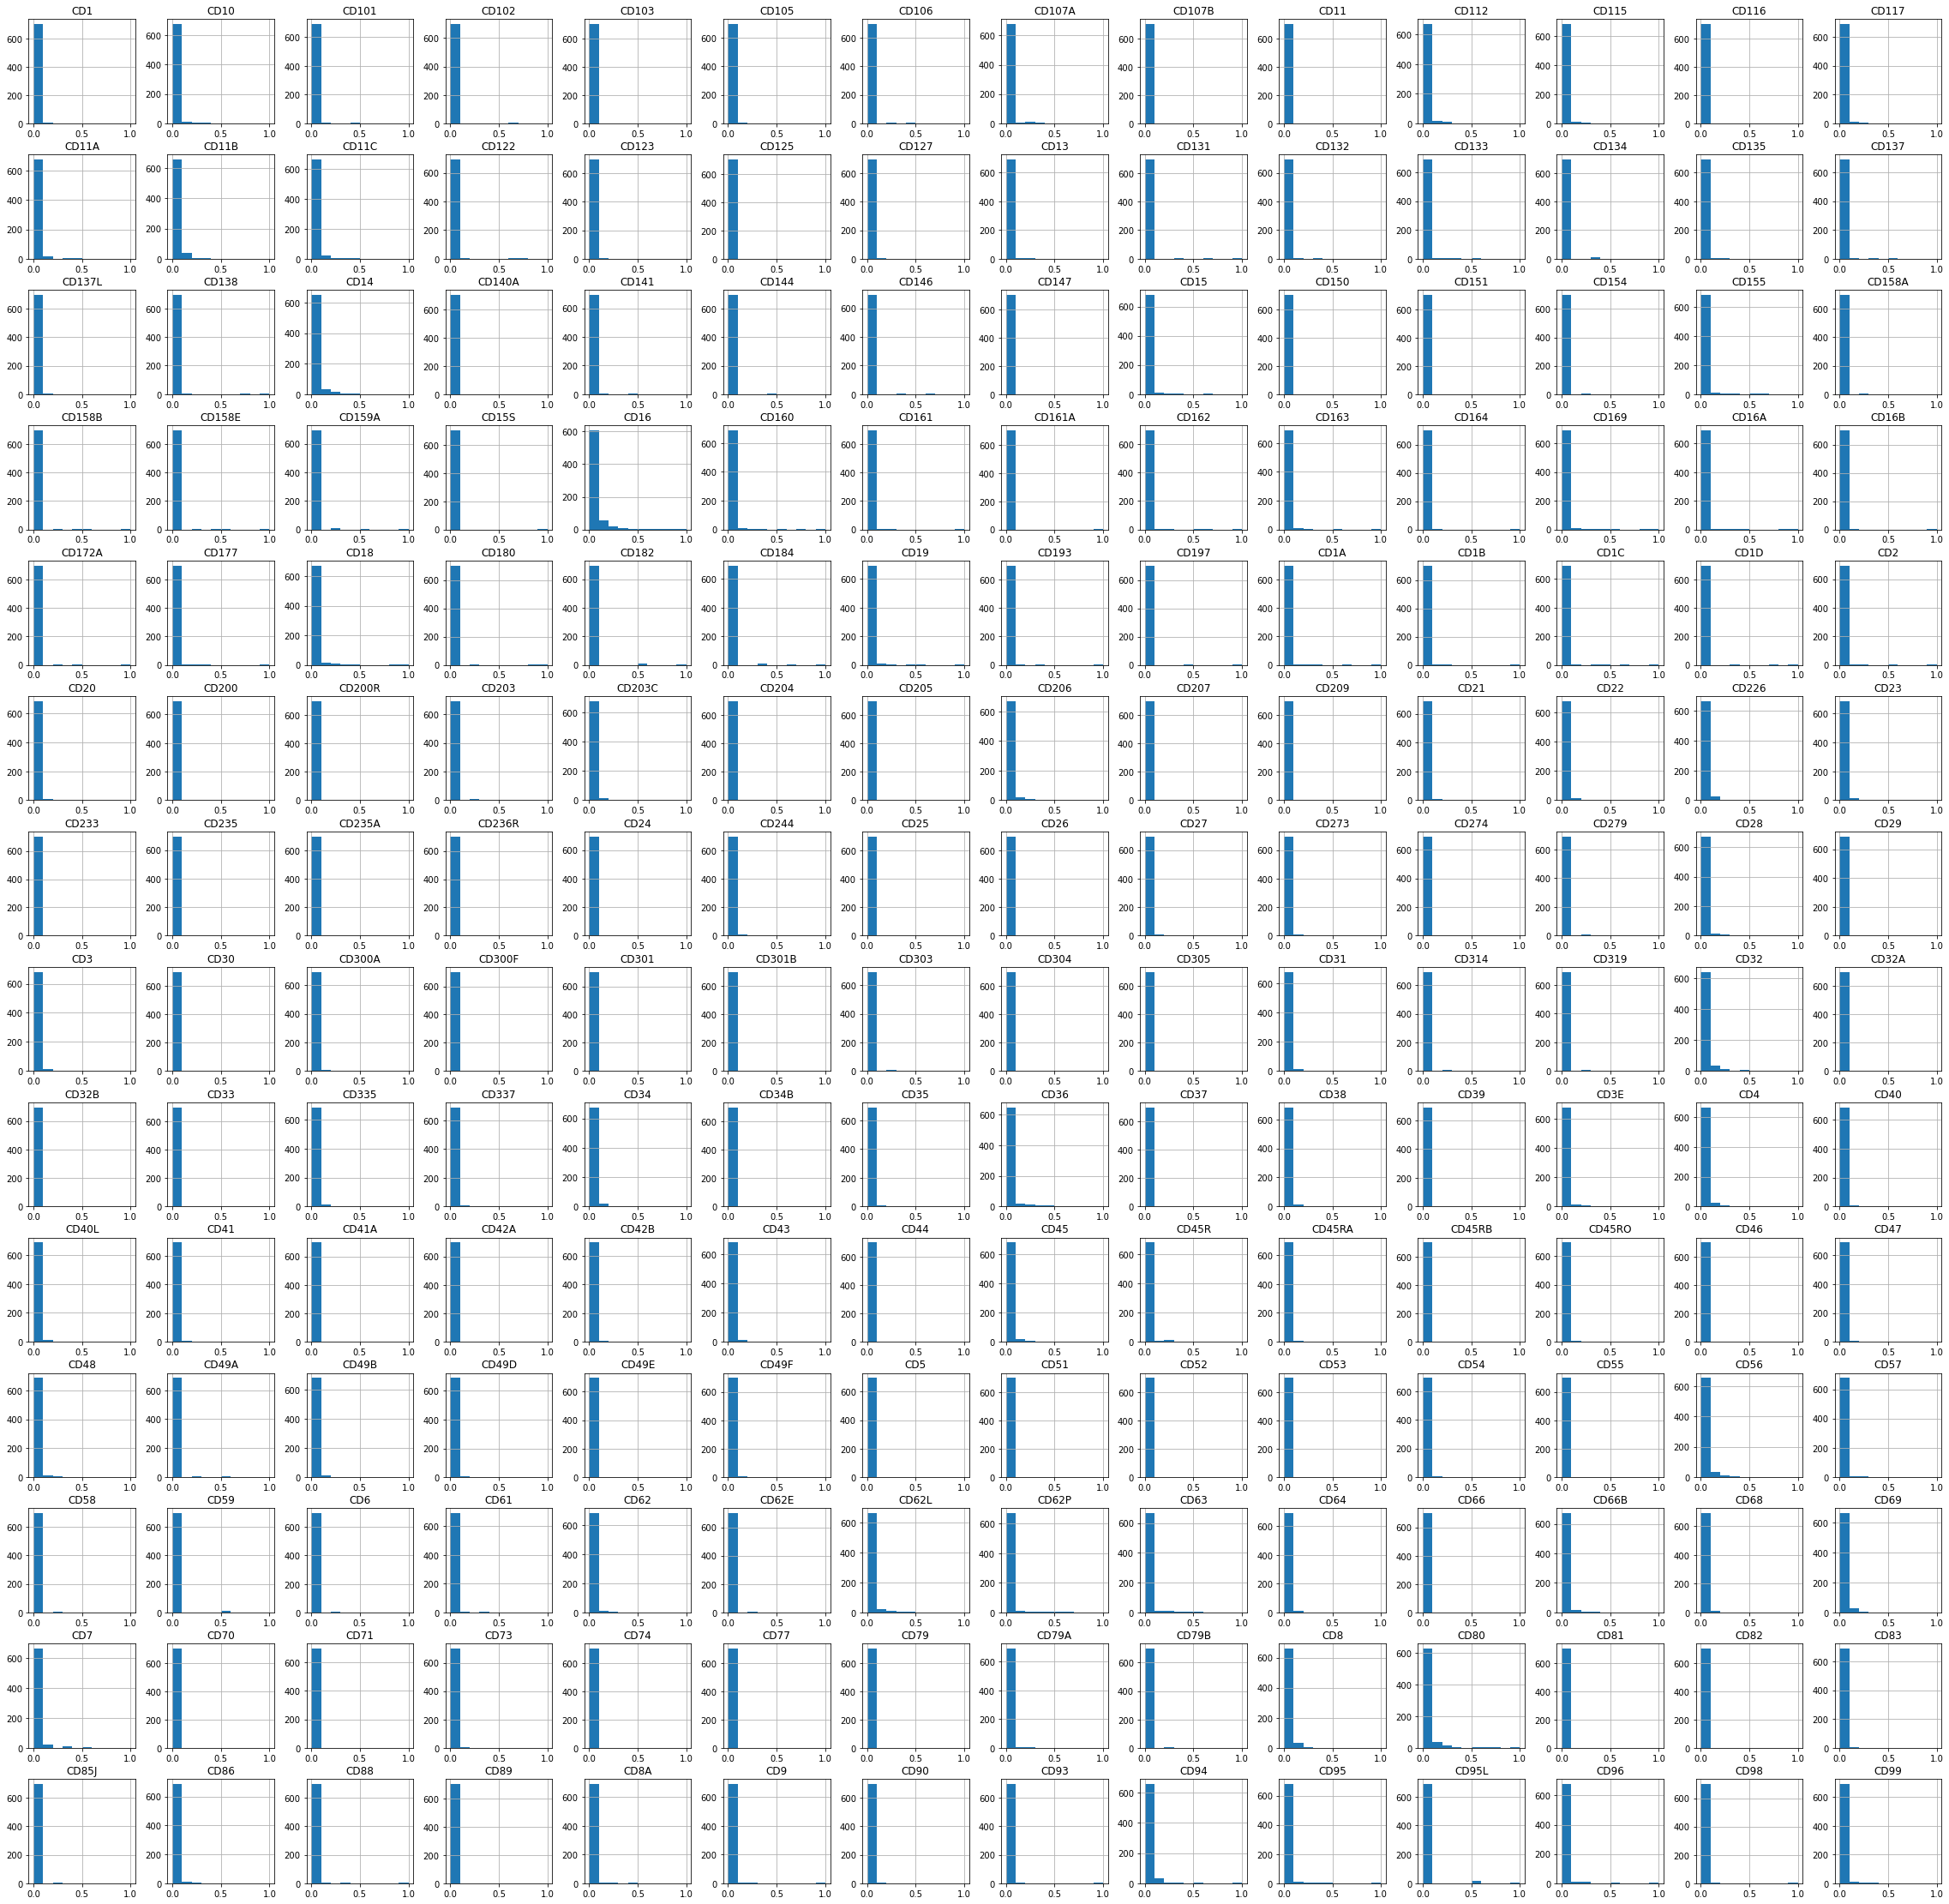

In [1550]:
transf_markers_df.hist(figsize=(40, 40))

In [1594]:
normalize_cells=Normalizer().fit(cells_df)
norm_cells_df=pd.DataFrame(normalize_cells.transform(cells_df),columns=cells_df.columns)
norm_cells_df

,Monocyte,T_lymphocyte,B_lymphocyte,Natural_Killer,Neutrophil,Eosinophil,Basophil,Macrophage,Erythrocyte,Platelet
0,0.998470,0.000000,0.000000,0.0,0.002903,0.0,0.000000,0.055148,0.002903,0.000000
1,0.993128,0.000000,0.000000,0.0,0.009458,0.0,0.000000,0.116653,0.000000,0.000000
2,0.999913,0.000000,0.007299,0.0,0.000000,0.0,0.000000,0.010948,0.000000,0.000000
3,0.999924,0.000000,0.000000,0.0,0.011049,0.0,0.000000,0.005524,0.000000,0.000000
4,0.997776,0.000000,0.000000,0.0,0.065582,0.0,0.000000,0.011711,0.002342,0.000000
...,...,...,...,...,...,...,...,...,...,...
703,0.135258,0.000000,0.000000,0.0,0.063651,0.0,0.000000,0.015913,0.063651,0.986585
704,0.000000,0.016804,0.000000,0.0,0.000000,0.0,0.000000,0.008402,0.999824,0.000000
705,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.285714,0.000000,0.857143,0.428571
706,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000


In [1596]:
binarize_cells = Binarizer(threshold=0.7).fit(norm_cells_df)
bin_cells_df=pd.DataFrame(binarize_cells.transform(norm_cells_df),columns=cells_df.columns)

In [1599]:
bin_cells_df.T.sum().sort_values()

662    0.0
599    0.0
590    0.0
581    0.0
576    0.0
      ... 
239    1.0
231    1.0
543    2.0
85     2.0
707    2.0
Length: 708, dtype: float64

In [1609]:
X=transf_markers_df
y=bin_cells_df

In [1611]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,train_size=0.75,random_state=100)

In [1652]:
y_train_for_regr=y_train.rename(columns={'Monocyte':'1','T_lymphocyte':'2','B_lymphocyte':'3','Natural_Killer':'4','Neutrophil':'5','Eosinophil':'6','Basophil':'7','Macrophage':'8','Erythrocyte':'9','Platelet':'10'}).idxmax(axis=1).to_numpy()

In [1655]:
X_train_for_regr=X_train.to_numpy()

In [1680]:
X_test_for_regr=X_test.to_numpy()

In [1683]:
y_test_for_regr=y_test.rename(columns={'Monocyte':'1','T_lymphocyte':'2','B_lymphocyte':'3','Natural_Killer':'4','Neutrophil':'5','Eosinophil':'6','Basophil':'7','Macrophage':'8','Erythrocyte':'9','Platelet':'10'}).idxmax(axis=1).to_numpy()

In [1853]:
X_NB=markers_df.reset_index().drop('article_id',axis=1)
y_NB=bin_cells_df

In [1854]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB=train_test_split(X_NB,y_NB,test_size=0.25,train_size=0.75,random_state=100)

In [1859]:
y_train_for_bayes=y_train_NB.rename(columns={'Monocyte':'1','T_lymphocyte':'2','B_lymphocyte':'3','Natural_Killer':'4','Neutrophil':'5','Eosinophil':'6','Basophil':'7','Macrophage':'8','Erythrocyte':'9','Platelet':'10'}).idxmax(axis=1).to_numpy()

In [1861]:
y_test_for_bayes=y_test_NB.rename(columns={'Monocyte':'1','T_lymphocyte':'2','B_lymphocyte':'3','Natural_Killer':'4','Neutrophil':'5','Eosinophil':'6','Basophil':'7','Macrophage':'8','Erythrocyte':'9','Platelet':'10'}).idxmax(axis=1).to_numpy()

In [1862]:
X_train_for_bayes=X_train_NB.to_numpy()

In [1864]:
X_test_for_bayes=X_test_NB.to_numpy()

In [2235]:
log_reg_clf=LogisticRegressionCV()

In [1664]:
parametrs={'Cs':range(8,12),'cv':[5],'solver':('lbfgs','newton-cg','sag','saga'),'max_iter':range(30,100,10),'n_jobs':[-1],'refit':('True','False'),'multi_class':['multinomial'],'random_state':[10]}

In [2237]:
parametrs={'Cs':range(8,12),'cv':[5],'solver':['newton-cg'],'max_iter':range(30,100,10),'n_jobs':[-1],'refit':('True','False'),'multi_class':['multinomial'],'random_state':[10]}

In [2238]:
grid_search_cv_clf=GridSearchCV(log_reg_clf,parametrs,n_jobs=-1)

In [2239]:
grid_search_cv_clf.fit(X_train_for_regr,y_train_for_regr)
grid_search_cv_clf.score(X_train_for_regr,y_train_for_regr)

0.9096045197740112

In [1675]:
grid_search_cv_clf.fit(X_train_for_regr,y_train_for_regr)
grid_search_cv_clf.score(X_train_for_regr,y_train_for_regr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

0.847457627118644

In [1668]:
grid_search_cv_clf.best_params_

{'Cs': 11,
 'cv': 5,
 'max_iter': 50,
 'multi_class': 'multinomial',
 'n_jobs': -1,
 'random_state': 10,
 'refit': 'True',
 'solver': 'saga'}

In [2240]:
grid_search_cv_clf.best_params_

{'Cs': 11,
 'cv': 5,
 'max_iter': 30,
 'multi_class': 'multinomial',
 'n_jobs': -1,
 'random_state': 10,
 'refit': 'True',
 'solver': 'newton-cg'}

In [2241]:
best_clf=grid_search_cv_clf.best_estimator_

In [2242]:
best_clf

LogisticRegressionCV(Cs=11, cv=5, max_iter=30, multi_class='multinomial',
                     n_jobs=-1, random_state=10, refit='True',
                     solver='newton-cg')

In [2243]:
predictions=best_clf.predict(X_test_for_regr)
precision=precision_score(y_test_for_regr, predictions, average='micro')

In [2244]:
precision

0.7457627118644068

In [2475]:
log_reg_clf_2=LogisticRegressionCV(Cs=11,solver='newton-cg',cv=5,n_jobs=-1,multi_class='multinomial',random_state=10,max_iter=50)
log_reg_clf_2.fit(X_train_for_regr,y_train_for_regr)
log_reg_clf_2.score(X_train_for_regr,y_train_for_regr)

0.9096045197740112

In [1757]:
log_reg_clf_2

LogisticRegressionCV(Cs=11, cv=5, max_iter=50, multi_class='multinomial',
                     n_jobs=-1, random_state=10, solver='newton-cg')

In [2476]:
predictions_2=log_reg_clf_2.predict(X_test_for_regr)
precision_2=precision_score(y_test_for_regr, predictions_2, average='micro')
precision_2

0.7457627118644068

In [2549]:
log_regr_coeff=log_reg_clf_2.coef_

In [2540]:
classes=['Monocyte','Platelet','T_lymphocyte','B_lymphocyte','Natural_Killer','Neutrophil','Eosinophil','Basophil','Macrophage','Erythrocyte']

In [2550]:
importance_of_markers=pd.DataFrame(log_regr_coeff,columns=X_test.columns,index=classes).T.reset_index().rename(columns={'index':'markers'})
importance_of_markers

,markers,Monocyte,Platelet,T_lymphocyte,B_lymphocyte,Natural_Killer,Neutrophil,Eosinophil,Basophil,Macrophage,Erythrocyte
0,CD1,0.103404,-0.578801,0.740242,-0.261781,0.056515,5.087059,-1.144006,-2.952488,-0.972609,-0.077536
1,CD10,-1.721086,-1.499268,-2.199316,6.602119,-0.948583,6.366720,-3.389547,-1.335586,-1.132476,-0.742976
2,CD101,-1.013701,-0.573803,-1.750055,-1.098797,-0.769366,0.285338,7.399880,-1.106789,-0.933756,-0.438951
3,CD102,0.971980,0.813690,0.355568,-0.149176,-0.198759,-0.817393,-0.510756,-0.219723,-0.168459,-0.076972
4,CD103,0.817341,-0.530582,0.986147,-1.091628,-1.978438,0.711387,1.030140,-1.150177,1.670806,-0.464997
...,...,...,...,...,...,...,...,...,...,...,...
191,CD95,-1.390602,-0.764628,1.506735,0.962880,-0.835289,3.474446,-1.343695,-0.819164,-0.409139,-0.381544
192,CD95L,-3.982626,-0.683542,1.023005,-0.774292,2.182281,0.384318,-1.808234,-0.659579,4.685866,-0.367196
193,CD96,0.305494,-1.426271,0.114762,-0.828531,2.768603,-0.866335,-0.883857,-1.005957,2.369688,-0.547596
194,CD98,1.795229,-0.661859,-0.886113,-0.562805,0.273137,-0.617935,-0.798446,-0.594852,-0.832270,2.885915


<AxesSubplot:xlabel='Platelet', ylabel='markers'>

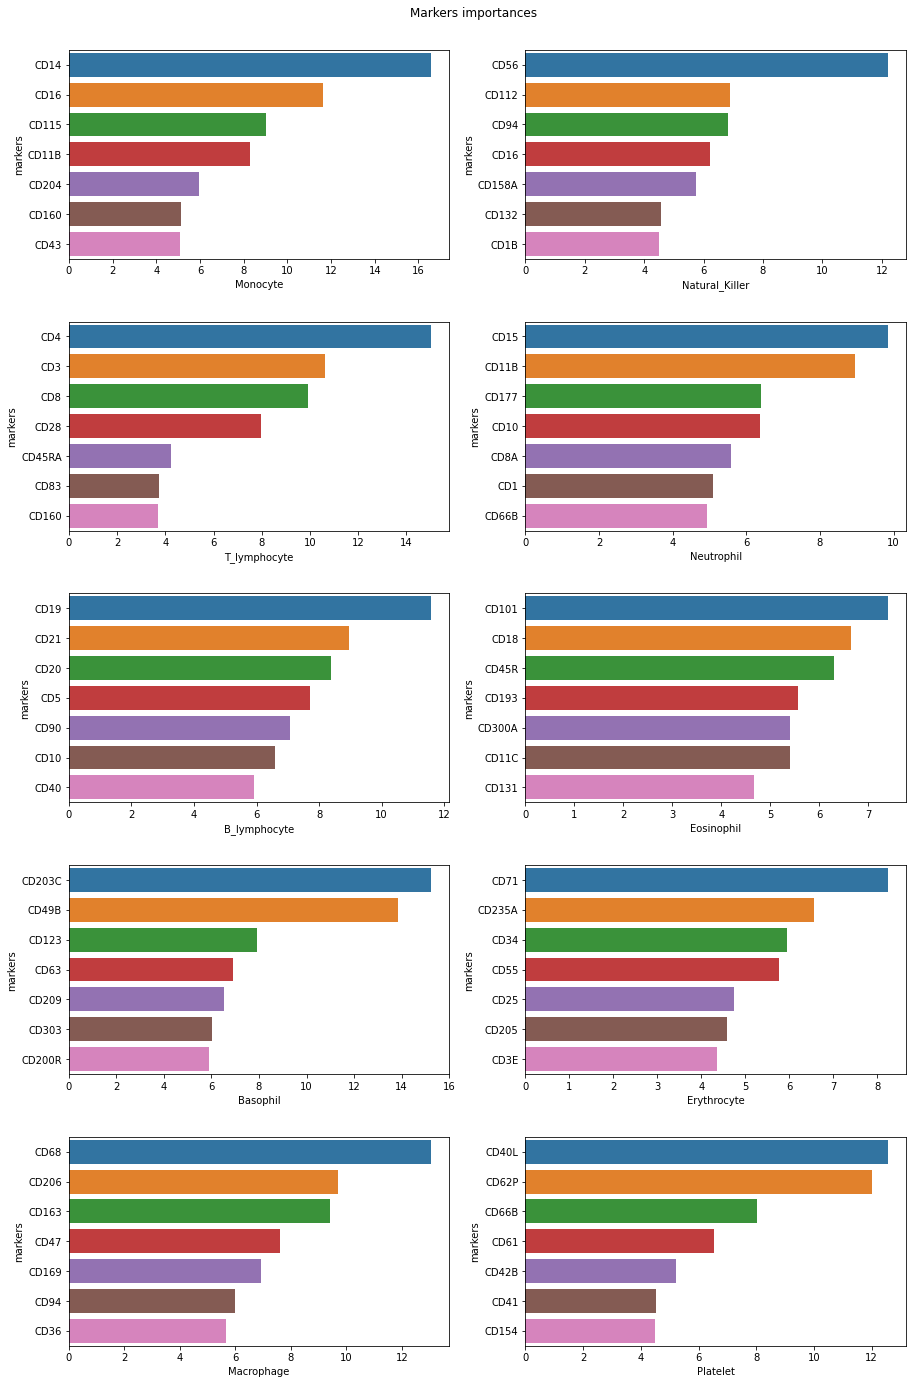

In [2551]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
plt.subplots_adjust(left=0.125, bottom=0.05, right=0.9, top=0.95, wspace=0.2, hspace=0.3)
fig.suptitle('Markers importances')
sns.barplot(ax=axes[0, 0], data=importance_of_markers.sort_values('Monocyte',ascending=False)[:7], x='Monocyte', y='markers')
sns.barplot(ax=axes[1, 0], data=importance_of_markers.sort_values('T_lymphocyte',ascending=False)[:7], x='T_lymphocyte', y='markers')
sns.barplot(ax=axes[2, 0], data=importance_of_markers.sort_values('B_lymphocyte',ascending=False)[:7], x='B_lymphocyte', y='markers')
sns.barplot(ax=axes[0, 1], data=importance_of_markers.sort_values('Natural_Killer',ascending=False)[:7], x='Natural_Killer', y='markers')
sns.barplot(ax=axes[1, 1], data=importance_of_markers.sort_values('Neutrophil',ascending=False)[:7], x='Neutrophil', y='markers')
sns.barplot(ax=axes[2, 1], data=importance_of_markers.sort_values('Eosinophil',ascending=False)[:7], x='Eosinophil', y='markers')
sns.barplot(ax=axes[3, 0], data=importance_of_markers.sort_values('Basophil',ascending=False)[:7], x='Basophil', y='markers')
sns.barplot(ax=axes[4, 0], data=importance_of_markers.sort_values('Macrophage',ascending=False)[:7], x='Macrophage', y='markers')
sns.barplot(ax=axes[3, 1], data=importance_of_markers.sort_values('Erythrocyte',ascending=False)[:7], x='Erythrocyte', y='markers')
sns.barplot(ax=axes[4, 1], data=importance_of_markers.sort_values('Platelet',ascending=False)[:7], x='Platelet', y='markers')

<AxesSubplot:xlabel='Platelet', ylabel='markers'>

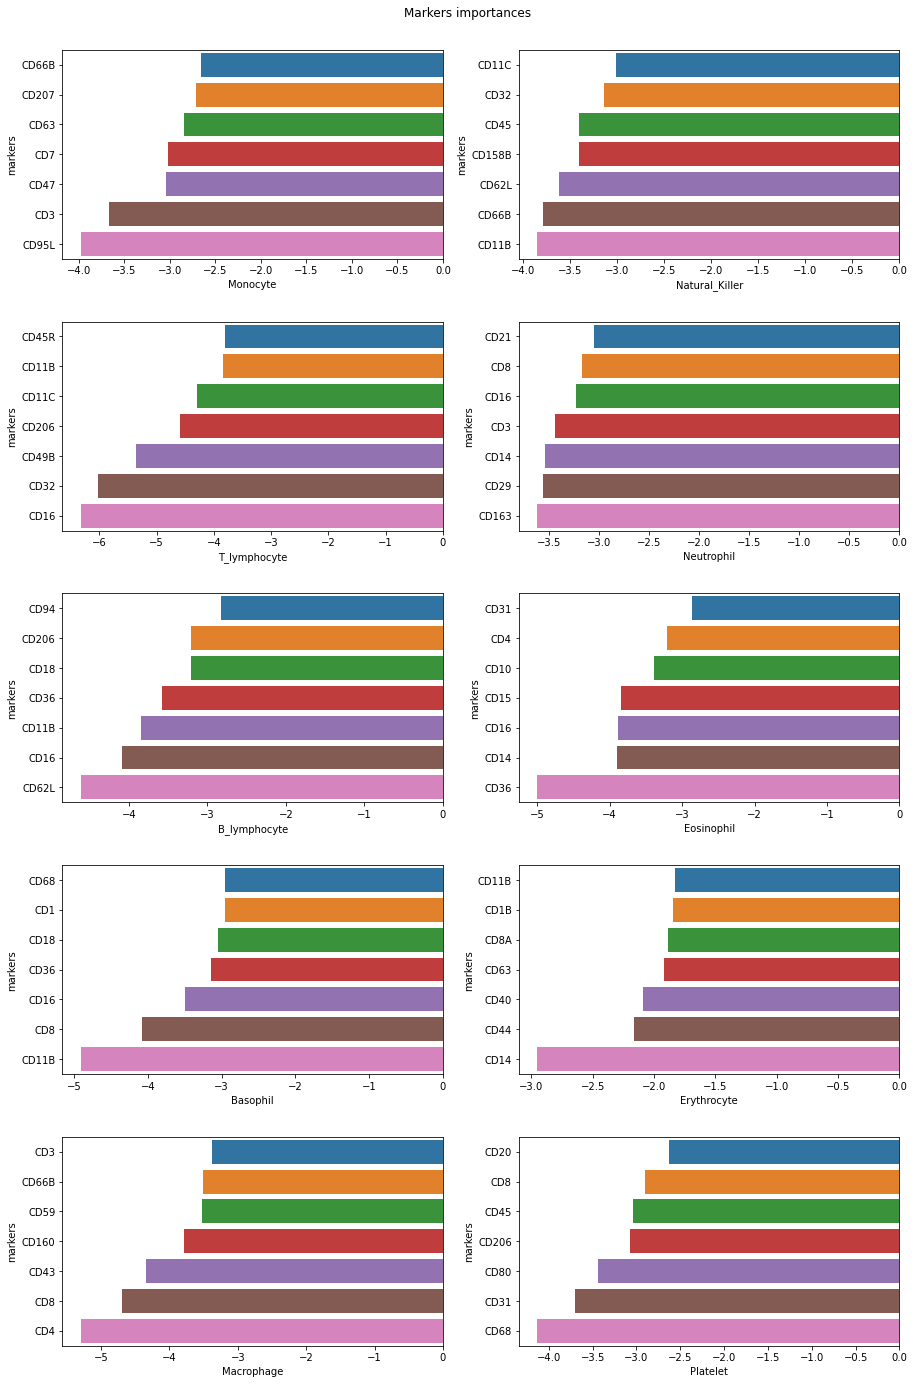

In [2552]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
plt.subplots_adjust(left=0.125, bottom=0.05, right=0.9, top=0.95, wspace=0.2, hspace=0.3)
fig.suptitle('Markers importances')
sns.barplot(ax=axes[0, 0], data=importance_of_markers.sort_values('Monocyte',ascending=False)[-7:], x='Monocyte', y='markers')
sns.barplot(ax=axes[1, 0], data=importance_of_markers.sort_values('T_lymphocyte',ascending=False)[-7:], x='T_lymphocyte', y='markers')
sns.barplot(ax=axes[2, 0], data=importance_of_markers.sort_values('B_lymphocyte',ascending=False)[-7:], x='B_lymphocyte', y='markers')
sns.barplot(ax=axes[0, 1], data=importance_of_markers.sort_values('Natural_Killer',ascending=False)[-7:], x='Natural_Killer', y='markers')
sns.barplot(ax=axes[1, 1], data=importance_of_markers.sort_values('Neutrophil',ascending=False)[-7:], x='Neutrophil', y='markers')
sns.barplot(ax=axes[2, 1], data=importance_of_markers.sort_values('Eosinophil',ascending=False)[-7:], x='Eosinophil', y='markers')
sns.barplot(ax=axes[3, 0], data=importance_of_markers.sort_values('Basophil',ascending=False)[-7:], x='Basophil', y='markers')
sns.barplot(ax=axes[4, 0], data=importance_of_markers.sort_values('Macrophage',ascending=False)[-7:], x='Macrophage', y='markers')
sns.barplot(ax=axes[3, 1], data=importance_of_markers.sort_values('Erythrocyte',ascending=False)[-7:], x='Erythrocyte', y='markers')
sns.barplot(ax=axes[4, 1], data=importance_of_markers.sort_values('Platelet',ascending=False)[-7:], x='Platelet', y='markers')

In [2470]:
multi_clf = MultinomialNB()
multi_clf.fit(X_train_for_bayes,y_train_for_bayes)
multi_clf.score(X_train_for_bayes,y_train_for_bayes)

0.815442561205273

In [2471]:
predictions_3=multi_clf.predict(X_test_for_bayes)
precision_3=precision_score(y_test_for_bayes, predictions_3, average='micro')
precision_3

0.7401129943502824

In [2462]:
svm_line_clf = LinearSVC(C=3.0,random_state=10)
svm_line_clf.fit(X_train_for_regr,y_train_for_regr)
svm_line_clf.score(X_train_for_regr,y_train_for_regr)

0.8757062146892656

In [2463]:
predictions_4=svm_line_clf.predict(X_test_for_regr)
precision_4=precision_score(y_test_for_regr, predictions_4, average='micro')
precision_4

0.7401129943502824

In [2024]:
multi_NB_prediction=pd.DataFrame(predictions_3,columns=['pred_class_2'],index=y_test.index)
multi_NB_prediction

,pred_class_2
569,4
474,3
613,10
152,5
566,4
...,...
333,8
218,7
278,7
581,4


In [2025]:
svm_linear_prediction=pd.DataFrame(predictions_4,columns=['pred_class_3'],index=y_test.index)
svm_linear_prediction

,pred_class_3
569,4
474,3
613,10
152,8
566,4
...,...
333,8
218,7
278,7
581,4


In [2026]:
true_answers=pd.DataFrame(y_test_for_regr,columns=['y_test'],index=y_test.index)
true_answers

,y_test
569,8
474,3
613,10
152,5
566,4
...,...
333,8
218,7
278,7
581,1


In [2027]:
line_regr_prediction=pd.DataFrame(predictions_2,columns=['pred_class_1'],index=y_test.index)
line_regr_prediction

,pred_class_1
569,4
474,3
613,10
152,5
566,4
...,...
333,8
218,7
278,7
581,4


In [2042]:
total_predictions=true_answers.join(line_regr_prediction).join(multi_NB_prediction).join(svm_linear_prediction)
total_predictions

,y_test,pred_class_1,pred_class_2,pred_class_3
569,8,4,4,4
474,3,3,3,3
613,10,10,10,10
152,5,5,5,8
566,4,4,4,4
...,...,...,...,...
333,8,8,8,8
218,7,7,7,7
278,7,7,7,7
581,1,4,4,4


In [2455]:
mistakes_points=total_predictions.query('y_test!=pred_class_1 and y_test!=pred_class_2 and y_test!=pred_class_3 ').astype('int')
mistakes_points.groupby('y_test').apply(display)

,y_test,pred_class_1,pred_class_2,pred_class_3
662,1,8,4,4
599,1,4,4,4
560,1,4,4,4
656,1,8,8,8
42,1,5,5,5
511,1,3,3,3
459,1,7,7,7
581,1,4,4,4


,y_test,pred_class_1,pred_class_2,pred_class_3
408,2,5,6,5
402,2,3,5,3
533,2,4,4,4


,y_test,pred_class_1,pred_class_2,pred_class_3
510,3,2,2,2
494,3,2,2,2
509,3,10,10,10
493,3,2,2,2
467,3,2,2,2


,y_test,pred_class_1,pred_class_2,pred_class_3
540,4,8,8,8


,y_test,pred_class_1,pred_class_2,pred_class_3
157,5,3,3,3
114,5,2,3,2
149,5,6,1,6
133,5,2,2,2
160,5,1,1,1
104,5,6,6,6


,y_test,pred_class_1,pred_class_2,pred_class_3
193,6,5,1,1
200,6,5,1,5
189,6,2,2,2
197,6,2,2,2
195,6,8,5,5


,y_test,pred_class_1,pred_class_2,pred_class_3
259,7,3,3,3
265,7,6,6,2


,y_test,pred_class_1,pred_class_2,pred_class_3
569,8,4,4,4
54,8,1,5,1
512,8,3,3,3
307,8,3,1,1


,y_test,pred_class_1,pred_class_2,pred_class_3
609,9,8,8,8


""


In [2598]:
bin_cells_df.T.sum().sort_values()[:10]

662    0.0
599    0.0
590    0.0
581    0.0
576    0.0
560    0.0
511    0.0
528    0.0
517    1.0
464    1.0
dtype: float64

In [2559]:
bin_cells_df.T.sum().sort_values()[-5:]

239    1.0
231    1.0
543    2.0
85     2.0
707    2.0
dtype: float64

In [2631]:
total_predictions.loc[560]

y_test          1
pred_class_1    4
pred_class_2    4
pred_class_3    4
Name: 560, dtype: object

In [2632]:
y_test.loc[560]

Monocyte          0.0
T_lymphocyte      0.0
B_lymphocyte      0.0
Natural_Killer    0.0
Neutrophil        0.0
Eosinophil        0.0
Basophil          0.0
Macrophage        0.0
Erythrocyte       0.0
Platelet          0.0
Name: 560, dtype: float64

In [2633]:
cells_df.iloc[560].to_frame(name='value')

,value
Monocyte,3
T_lymphocyte,3
B_lymphocyte,0
Natural_Killer,4
Neutrophil,2
Eosinophil,0
Basophil,0
Macrophage,5
Erythrocyte,0
Platelet,0


In [2634]:
markers_df.iloc[560].to_frame(name='value').query('value>1')

,value
CD112,3
CD155,16
CD16,42
CD16A,6
CD16B,2
CD19,2
CD25,2
CD4,4
CD44,7
CD56,23
